# Taller Regresión Lineal 📉

```
Integrantes = [
    'Daniel Andrade',
    'Gabriel Cubides',
    'Dewith Miramón',
    'Santiago Prado'
]

```

## Punto 1

Una compañía está interesada en construir un modelo que le ayude a predecir el precio de una vivienda a
partir de algunas de sus propiedades. Usted cuenta con un conjunto de datos [1] de 2930 registros y 6
características:

- ```Overall Qual```:  Calificación de la calidad materiales utilizados y los acabados de la vivienda. Escala de 1 a 10 siendo 1 muy pobre y 10 excelente.
- ```Overall Cond```: Calificación del estado actual de la vivienda. Escala de 1 a 10 siendo 1 muy pobre y 10 excelente.
- ```Gr Liv Area```: Superficie habitable por encima del nivel del suelo en pies cuadrados
- ```Central Air```: Aire acondicionado (N=no, Y=sí)
- ```Total Bsmt SF```: Área total del sótano en pies cuadrados
- ```SalePrice```: Precio de venta en USD

Su objetivo es construir un modelo de regresión que permita predecir el precio de viviendas y soporte la
toma de decisiones relacionada con las inversiones de la compañía. Como parte del proceso usted deberá
realizar:



In [ ]:
# Data
import numpy as np
import pandas as pd
from itertools import combinations

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [ ]:
data_url = (
    "https://raw.githubusercontent.com/"
    "jpospinalo/MachineLearning/main/"
    "Linear%20Regression/ames-housing.csv"
)
data = pd.read_csv(data_url, sep=';')

### A. Análisis exploratorio

Realice una exploración de los datos:
- [x] Construya un DataFrame con la información suministrada y genere un resumen de los datos a través del método ```info()```
- [x] Genere un resumen estadístico utilizando el método ```describe()```
- [x] Genere el histograma de frecuencias para todas las características disponibles
- [x] Genere un conjunto de datos de prueba con el 20% de los datos disponibles. Recuerde no realizar ningún cambio antes de dividir los datos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 137.5+ KB


In [ ]:
data.describe()

,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,SalePrice
count,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000
mean,6.094881,5.563140,1051.614544,1499.690444,180796.060068
std,1.411026,1.111537,440.615067,505.508887,79886.692357
min,1.000000,1.000000,0.000000,334.000000,12789.000000
25%,5.000000,5.000000,793.000000,1126.000000,129500.000000
50%,6.000000,5.000000,990.000000,1442.000000,160000.000000
75%,7.000000,6.000000,1302.000000,1742.750000,213500.000000
max,10.000000,9.000000,6110.000000,5642.000000,755000.000000


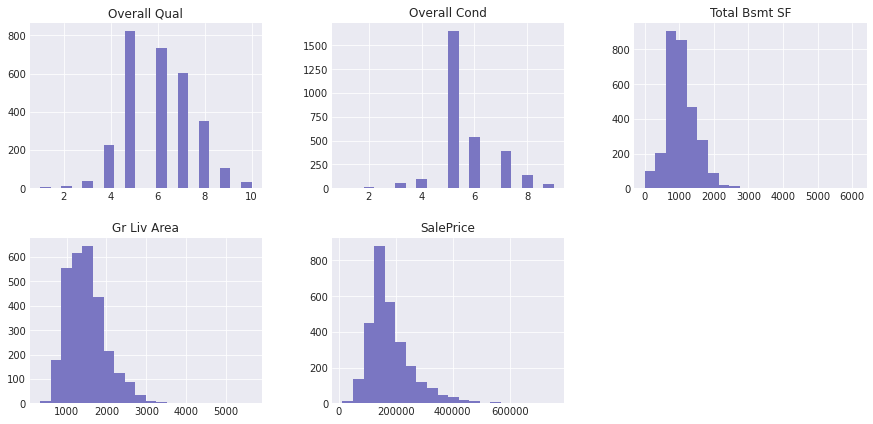

In [ ]:
data.hist(layout=(2, 3), figsize=(15, 7), bins=20)
plt.show()

In [ ]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### B. Preparación de los datos

Para los datos disponibles:

- [x] Verifique si existen valores faltantes.
- [x] ¿Qué tratamiento daría a la característica Central Air?
- [x] Identifique posibles valores atípicos que puedan afectar modelo. Elimine los valores utilizando el método IQR (si lo considera necesario).
- [x] Genere una matriz de dispersión para identificar posibles correlaciones. Genere dos versiones de la matriz: una con matplotlib y otra con seaborn.
- [x] Genere la matriz de correlación para todas las características y preséntela a través de un mapa de calor. Identifique las características que podrían llegar a tener mayor influencia sobre el modelo.
- [x] Normalice los datos disponibles utilizando el método del valor Z.

Notamos que la única variable  con valores nulos es ```Total Bsmt SF```, decidimos llenar nulos con la media del los datos entrenamiento.

In [ ]:
X_train.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
dtype: int64

In [ ]:
numeric_cols = ['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Gr Liv Area']

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train[numeric_cols])

X_train[numeric_cols] = imputer.transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

In [ ]:
X

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area
0,6,5,1080.0,Y,1656
1,5,6,882.0,Y,896
2,6,6,1329.0,Y,1329
3,7,5,2110.0,Y,2110
4,5,5,928.0,Y,1629
...,...,...,...,...,...
2925,6,6,1003.0,Y,1003
2926,5,5,864.0,Y,902
2927,5,5,912.0,Y,970
2928,5,5,1389.0,Y,1389


Para tratar la variable ```Central Air```, la convertiremos en una variable dicotómica que toma valores 0 cuando la propiedad no tiene aire acondicionado y 1 cuando sí lo tiene.

In [ ]:
X_train['Central Air'].replace({'Y': 1, 'N': 0}, inplace=True)
X_test['Central Air'].replace({'Y': 1, 'N': 0}, inplace=True)

@TODO

Para detectar outliers...

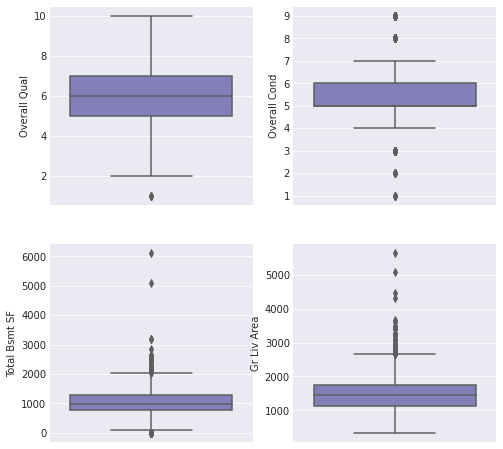

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(8,8))

#create boxplot in each subplot
sns.boxplot(data=X_train, y='Overall Qual', ax=axes[0,0])
sns.boxplot(data=X_train, y='Overall Cond', ax=axes[0,1])
sns.boxplot(data=X_train, y='Total Bsmt SF', ax=axes[1,0])
sns.boxplot(data=X_train, y='Gr Liv Area', ax=axes[1,1])
plt.show()

Los diagramas de dispersión entre las variables nos deja ver que hay una correlación positiva entre el precios y los demás atributos de las propiedades 

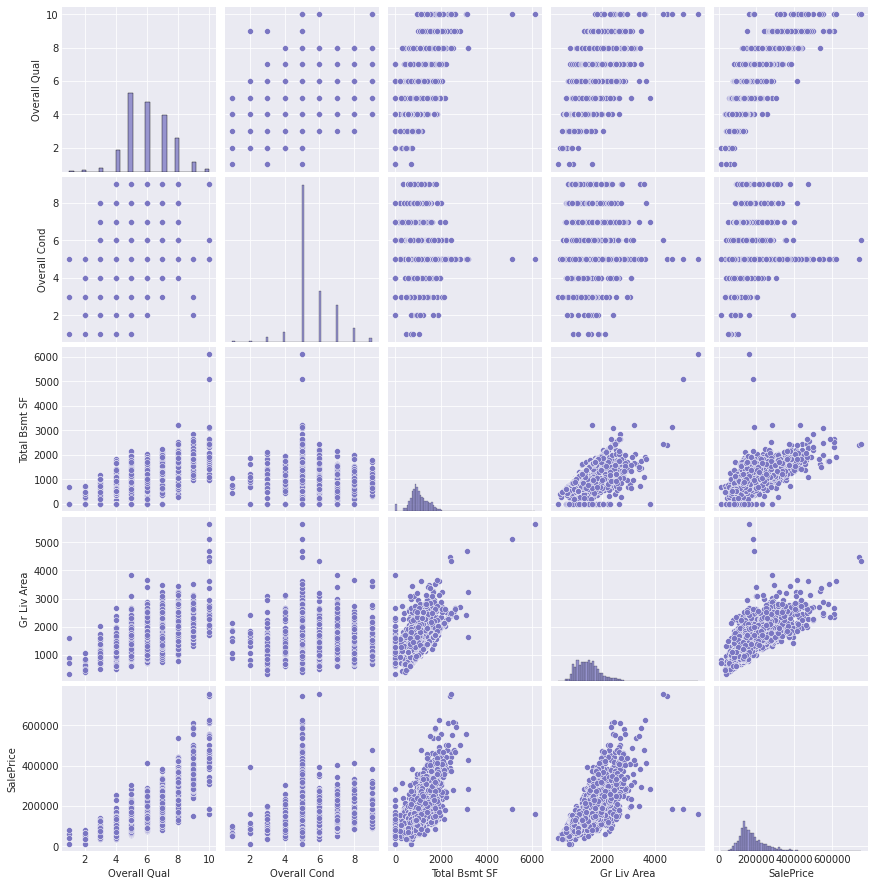

In [ ]:
sns.pairplot(data)
plt.show()

Podemos notar que las variables con mayor correlación con la calidad de los materiales, la superficie habitable y la superficie del sótano. Es extraño notar que la variable que evalúa la condición del inmueble no esté correlacionada con el precio.

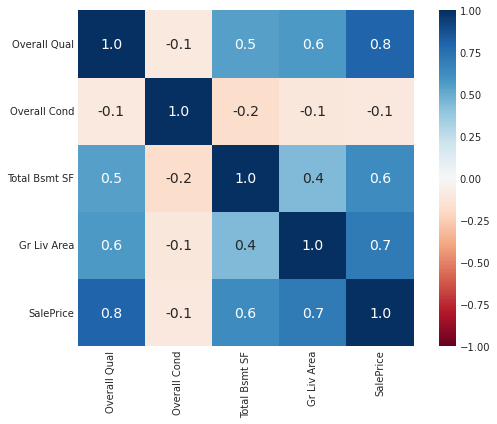

In [ ]:
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(
    data = corr, cbar=True, square=True, annot=True, 
    fmt= '.1f', annot_kws={'size': 14}, 
    xticklabels= corr.columns, yticklabels= corr.columns,
    vmin=-1, vmax=1,
    cmap="RdBu"
)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

Para normalizar los valores utlizamos la clase ```StandardScaler``` de Sklearn

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### C. Generar el modelo

- [x] Construya un modelo para cada una de las posibles combinaciones de características
- [x] Suponga que recibe un nuevo dataset con 100 características ¿es viable probar todas las combinaciones? ¿Cuántas modelos se generarían?
    ```
    > Rta. No sería viable probarlas ya que se generarían mas de 1.26x10^30 combinaciones.
    ```
- [x] Seleccione los 5 modelos con el coeficiente de determinación más alto y compárelos con un diagrama de barras.
- [x] Genere los diagramas de residuos para los modelos seleccionados utilizando el conjunto de datos de entrenamiento


In [ ]:
input_cols = X_train.columns

output = sum([list(map(list, combinations(input_cols, i))) for i in range(len(input_cols) + 1)], [])
output = output[1:]

In [ ]:
%%time

models = []
errors = []
for columns in output:
    regressor = LinearRegression()
    regressor.fit(X_train[columns].values.reshape(-1, len(columns)), y_train.reshape(-1,1))
    models.append(regressor)
    
    y_pred = regressor.predict(X_test[columns].values.reshape(-1, len(columns)))
    error = r2_score(y_test, y_pred)
    errors.append(error)
    print('Error modelo usando ',columns,':', round(error))


Error modelo usando  ['Overall Qual'] : 1
Error modelo usando  ['Overall Cond'] : 0
Error modelo usando  ['Total Bsmt SF'] : 0
Error modelo usando  ['Central Air'] : 0
Error modelo usando  ['Gr Liv Area'] : 1
Error modelo usando  ['Overall Qual', 'Overall Cond'] : 1
Error modelo usando  ['Overall Qual', 'Total Bsmt SF'] : 1
Error modelo usando  ['Overall Qual', 'Central Air'] : 1
Error modelo usando  ['Overall Qual', 'Gr Liv Area'] : 1
Error modelo usando  ['Overall Cond', 'Total Bsmt SF'] : 0
Error modelo usando  ['Overall Cond', 'Central Air'] : 0
Error modelo usando  ['Overall Cond', 'Gr Liv Area'] : 1
Error modelo usando  ['Total Bsmt SF', 'Central Air'] : 0
Error modelo usando  ['Total Bsmt SF', 'Gr Liv Area'] : 1
Error modelo usando  ['Central Air', 'Gr Liv Area'] : 1
Error modelo usando  ['Overall Qual', 'Overall Cond', 'Total Bsmt SF'] : 1
Error modelo usando  ['Overall Qual', 'Overall Cond', 'Central Air'] : 1
Error modelo usando  ['Overall Qual', 'Overall Cond', 'Gr Liv Area'

In [ ]:
models_results = list(zip(output,models,errors))
models_results.sort(key=lambda tup: tup[2],reverse=True)
models_best = models_results[:5]

serie = pd.Series(errors, index=[", ".join(x) for x in output])
serie.sort_values(inplace=True, ascending=False)

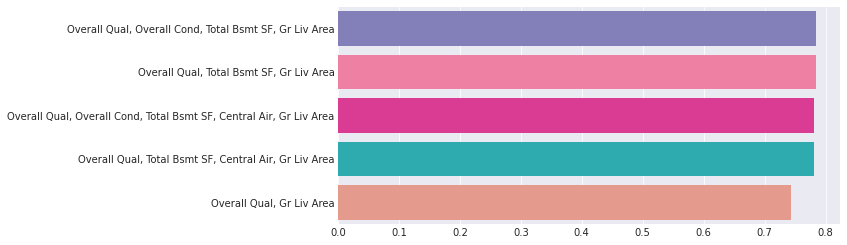

In [ ]:
plt.figure(figsize=(9, 4))
sns.barplot(x=serie.values[:5], y=serie.index[:5])
plt.show()

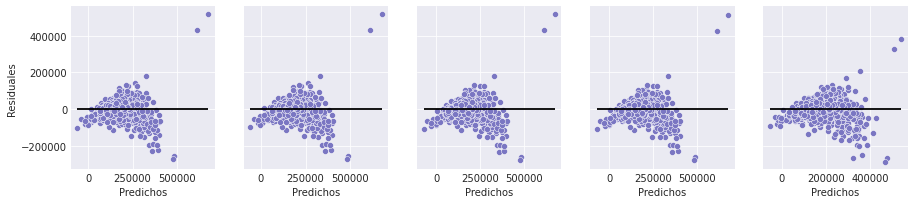

In [ ]:
import warnings
#from sklearn.exceptions import UserWarning
warnings.filterwarnings(action='ignore')

fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True, sharex=False)
for i, model in enumerate(models_best):
    regressor = model[1]
    cols = model[0]
    y_train_pred = regressor.predict(X_train[cols]).reshape(1, -1)[0]
    sns.scatterplot(x=y_train_pred,  y=y_train_pred - y_train, ax=axes[i])
    axes[i].hlines(y=0, 
                    xmin=np.min(y_train_pred), 
                    xmax=np.max(y_train_pred), 
                    color='black', alpha=0.9,
                    lw=2)
    axes[i].set_xlabel('Predichos')
    axes[i].set_ylabel('Residuales')


### D. Evaluación de desempeño

- [x] Evalúe los modelos seleccionados con los datos de prueba. Recuerde normalizar los datos.
- [x] Verifique los coeficientes de determinación en cada caso e interprete los resultados 
- [x] Genere los gráficos de residuos en cada caso y verifique si las características tienen una relación lineal con la variable objetivo.
- [x] Calcule las siguientes métricas: MAE, MSE y RMSE. ¿Cuál sería la más adecuada para este problema?

**Comparación de métricas con los datos de evaluación**

In [ ]:
test_metrics = pd.DataFrame(columns=['Model', 'Media', 'MAE', 'MSE', 'RMSE', 'R2'])

for i, model in enumerate(models_best):
    regressor = model[1]
    cols = model[0]
    model_name = ", ".join(cols)
    y_test_pred = regressor.predict(X_test[cols]).reshape(1, -1)[0]
    model_metrics = pd.Series({
        'Model': model_name, 
        'Media': round(np.mean(y_test), 2),
        'MAE': round(mean_absolute_error(y_test, y_test_pred), 2),
        'MSE': round(mean_squared_error(y_test, y_test_pred), 2), 
        'RMSE': round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2), 
        'R2': round(r2_score(y_test, y_test_pred), 3)
    })
    test_metrics.loc[i] = model_metrics

test_metrics

,Model,Media,MAE,MSE,RMSE,R2
0,"Overall Qual, Overall Cond, Total Bsmt SF, Gr ...",189651.47,26958.54,1.725968e+09,41544.77,0.785
1,"Overall Qual, Total Bsmt SF, Gr Liv Area",189651.47,27046.94,1.731763e+09,41614.46,0.784
2,"Overall Qual, Overall Cond, Total Bsmt SF, Cen...",189651.47,27034.71,1.751547e+09,41851.49,0.782
3,"Overall Qual, Total Bsmt SF, Central Air, Gr L...",189651.47,27060.03,1.755424e+09,41897.78,0.781
4,"Overall Qual, Gr Liv Area",189651.47,30203.10,2.055416e+09,45336.69,0.744


Los coeficientes de determinación son muy similares en todos los modelos, la mayoría están alrededor de del 0.78, esto nos indica que 78% de la variablidad de nuestra variable objetivo (el precio) se puede explicar con las variables de entrada.

De todos los modelos el que logra el mayor R2 con el menor numero de variables es el segundo, es decir, que podemos explicar el precio unicamente usando las tres variables ```Overall Qual```, ```Total Bsmt SF``` y ```Gr Liv Area```

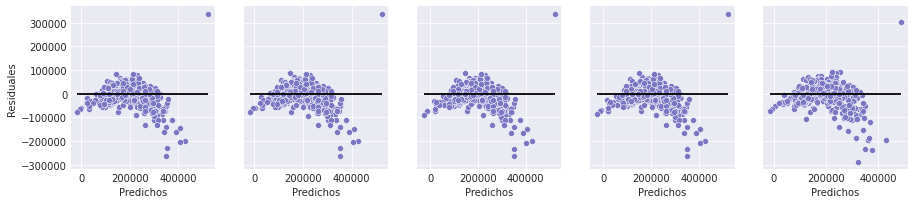

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True, sharex=False)
for i, model in enumerate(models_best):
    regressor = model[1]
    cols = model[0]
    y_test_pred = regressor.predict(X_test[cols]).reshape(1, -1)[0]
    sns.scatterplot(x=y_test_pred,  y=y_test_pred - y_test, ax=axes[i])
    axes[i].hlines(
        y=0, 
        xmin=np.min(y_test_pred), 
        xmax=np.max(y_test_pred), 
        color='black', alpha=0.9,
        lw=2
    )
    axes[i].set_xlabel('Predichos')
    axes[i].set_ylabel('Residuales')

Visualizando los diagramas de residuales, notamos que los errores no están aleatoriamente distribuidos sino que siguen un patrón curvo. Ello nos permite inferir que el modelo subestima los valores a medida que el precio real es mayor. Esto se puede deber a que la relación que tiene las variables de entrada y el target son es completamente lineal, o bien, que el modelo no tiene información suficiente para explicar los precios en las propiedades de alto valor.

#### Sobre qué metrica escoger

En este caso consideramos que la mejor métrica para escoger el mejor modelo sería el RSME, puesto que esta métrica penalizará aquellos modelos que tengan altos errores en la predicción. Al valuar casas preferimos un modelo que sea consistente y que no subestime o sobrestime signifcativamente los precios.



### E. Selección del modelo

- [x] Seleccione el modelo que a su modo de ver ofrece una mejor solución. Explique su respuesta.
- [x] ¿Considera que los datos proporcionados por la empresa son suficientes? ¿Son los adecuados? Presente algunas sugerencias para mejorar el estado actual del modelo.

#### El mejor modelo
Nuestro mejor modelo, basado en la métrica que consideramos la más adecuada (RSME), sería el que utiliza las siguientes features:
- Overall Qual, 
- Overall Cond, 
- Total Bsmt SF, 
- Gr Liv Area
Este modelo obtuvo un RSME de $41.545 en el set de evaluación. Ahora analizaremos su predicción visualmente con varios gráficos:

In [ ]:
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):
    '''Creates multiple plots to evaluate the model performance visually.'''
    from matplotlib.ticker import FuncFormatter
    from matplotlib.gridspec import GridSpec
    
    # This is optional, it's made for large values (i.e., money)
    def kilos(x, pos):
        'The two args are the value and tick position'
        return '{:3.0f}k'.format(x * 1e-3)
    formatter = FuncFormatter(kilos)
    # End of optional
    
    fig = plt.figure(constrained_layout=False, figsize=(12, 9))
    widths = [5, 5]
    heights = [3, 5]
    gs = fig.add_gridspec(ncols=2, nrows=2, wspace=0.4, hspace=0.35,
                          width_ratios=widths,
                          height_ratios=heights)
    
    # Histogram of Errors
    ax1 = fig.add_subplot(gs[0, :])
    ax1.set_title('Histogram of Errors')
    train_errors = y_train - y_train_pred
    test_errors = y_test - y_test_pred
    rango = (min(np.min(train_errors), 
                 np.min(test_errors)),
             max(np.max(train_errors), 
                 np.max(test_errors))) 
    
    errors_data = list(zip(
        np.concatenate([train_errors, test_errors]), 
        np.concatenate([np.full(len(train_errors), 'Train'), np.full(len(test_errors), 'Test')])
    ))
    errors = pd.DataFrame(errors_data, columns=['error', 'set'])
    sns.histplot(data=errors, x='error', hue='set', kde=False, bins=45,
                 hue_order=['Train', 'Test'], element='step', ax=ax1, legend=True)
    #sns.histplot(x=test_errors, kde=False, bins=45, label='Test',
    #             element='step', ax=ax1)
    ax1.set_ylabel('Quantity')
    ax1.set_xlabel('Error')
    #ax1.legend(fancybox=True, loc='right')
    ax1.xaxis.set_major_formatter(formatter)
    
    # Residuals plot
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.set_title('Residuals Plot')
    ax2.scatter(y_train_pred,  y_train_pred - y_train,
               s=25, edgecolor='white', linewidths=0.5, alpha=1,
               label='Train')
    ax2.scatter(y_test_pred, y_test_pred - y_test, 
               s=25, edgecolor='white', linewidths=0.5, alpha=1,
               label='Test')
    ax2.hlines(y=0, 
               xmin=np.min(ax2.get_xlim()), 
               xmax=np.max(ax2.get_xlim()), 
               color='black', alpha=1,
               lw=2)
    ax2.set_xlabel('Predicted values')
    ax2.set_ylabel('Residuals')
    ax2.legend(fancybox=True, loc='lower right')
    ax2.xaxis.set_major_formatter(formatter)
    ax2.yaxis.set_major_formatter(formatter)
    
    
    # Prediction errors  plot
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.set_title('Prediction Errors Plot')
    ax3.scatter(y_test, y_test_pred, #color=red,
                s=25, edgecolor='white', linewidths=0.5, alpha=1)
    lims = [np.min([ax3.get_xlim(), ax3.get_ylim()]),
            np.max([ax3.get_xlim(), ax3.get_ylim()])] 
    ax3.plot(lims, lims, '-k',  alpha=1, lw=2, label='Identity', color='black')
    sns.regplot(x=y_test, y=y_test_pred, scatter=False, ci=None,
                color='black', label='Best fit',
                line_kws={'ls': '--', 'alpha':0.6, 'lw':2})
    ax3.set_xlabel('Real (test)')
    ax3.set_ylabel('Predicted (test)')
    ax3.legend(fancybox=True, loc='lower right')
    ax3.xaxis.set_major_formatter(formatter)
    ax3.yaxis.set_major_formatter(formatter)
    plt.show()

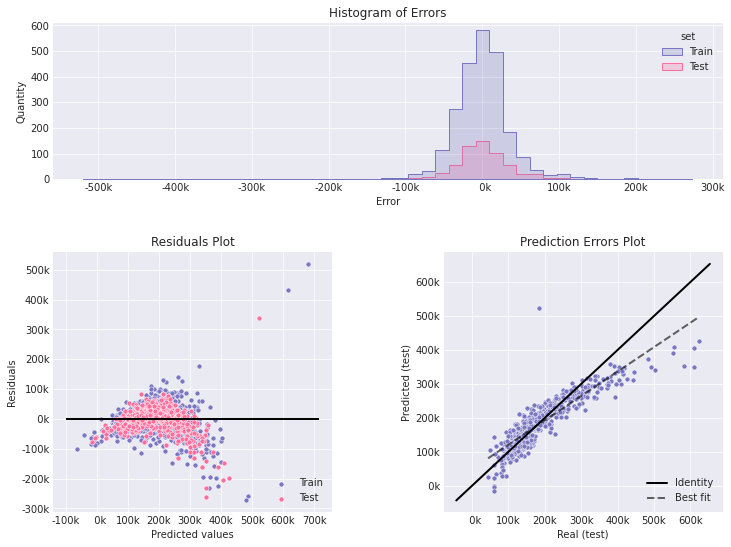

In [ ]:
best_model = models_best[0][1]
best_features = models_best[0][0]

y_train_pred = best_model.predict(X_train[best_features]).reshape(1, -1)[0]
y_test_pred = best_model.predict(X_test[best_features]).reshape(1, -1)[0]

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

Si bien nuestro mejor modelo tiene un comportamiento similar tanto en train como en test (es decir, no se sobreajusta), se nota que no es capaz de capturar del todo la relación entre las variables y el target, como ya mencionamos y genera que los errores no estén distribuidos aleatoriamente.

#### Ideas para mejorar el modelo
Para mejorar el rendimiento de modelo podría enriquecerse en dataset con otras variables del entorno de la propiedad tales como el índice de criminalidad por zona, el estatus socioeconómico y el número de negocios en los alrededores, entre otros. 

### F. Ecuaciones Normales

- [x] Encuentre la solución utilizando las ecuaciones normales. Compare los resultados obtenidos utilizando el gradiente descendente.

Las ecuaciones normales para el cálculo de los parámetros de la regresión multidimensional se pueden definir como:

$$\theta = (X^T X)^{-1} X^Ty$$

Siendo $X$ la matriz de caracteristicas y el vector o variable de salida.

In [ ]:
a = np.matmul(X_train.values.T, X_train.values)
np.matmul(np.matmul(np.linalg.inv(a), X_train.values.T), y_train)

array([ 26009.4902357 ,  -5655.10598062,  10399.77226605, 180942.56819248,
        29273.03747749])

In [ ]:
best_model.coef_

array([[39061.68930211,  1425.25930544, 15830.05613847, 25204.26215636]])

## Punto 2
A partir de lo aprendido en el curso de Kaggle “Introduction to machine learning”, genere dos nuevos
modelos utilizando árboles de decisión y bosques aleatorios. 
- [x] Compare ambos modelos con el seleccionado en el punto anterior. 
- [x] Compare las gráficas de residuos y el error cuadrado absoluto.

### A. Arbol de decisión

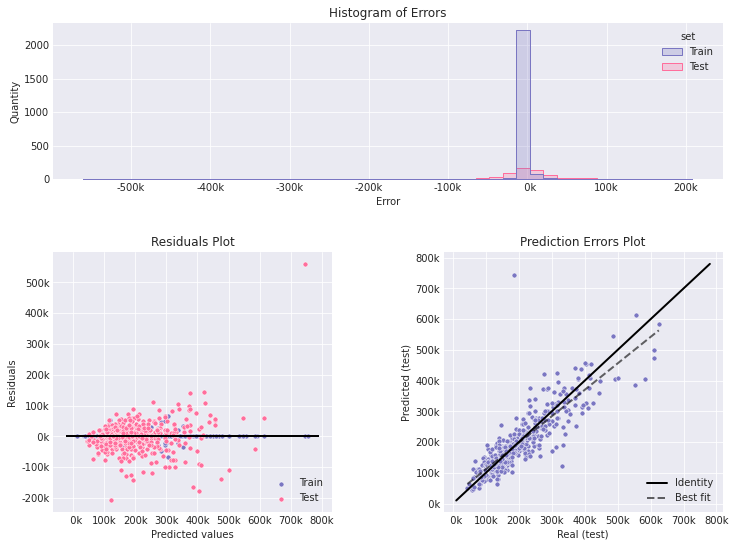

In [ ]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

y_train_pred_tree = tree.predict(X_train).reshape(1, -1)[0]
y_test_pred_tree = tree.predict(X_test).reshape(1, -1)[0]

evaluate_model(y_train, y_train_pred_tree, y_test, y_test_pred_tree)

In [ ]:
tree_metrics = {
    'Model': 'Decision Tree',
    'Media': round(np.mean(y_test), 2),
    'MAE': round(mean_absolute_error(y_test, y_test_pred_tree), 2),
    'MSE': round(mean_squared_error(y_test, y_test_pred_tree), 2), 
    'RMSE': round(np.sqrt(mean_squared_error(y_test, y_test_pred_tree)), 2), 
    'R2': round(r2_score(y_test, y_test_pred_tree), 3)
}

for k, v in tree_metrics.items():
    print(f"{k}: {v}")

Model: Decision Tree
Media: 189651.47
MAE: 26705.66
MSE: 1981078022.38
RMSE: 44509.3
R2: 0.753


### B. Bosques aleatorios

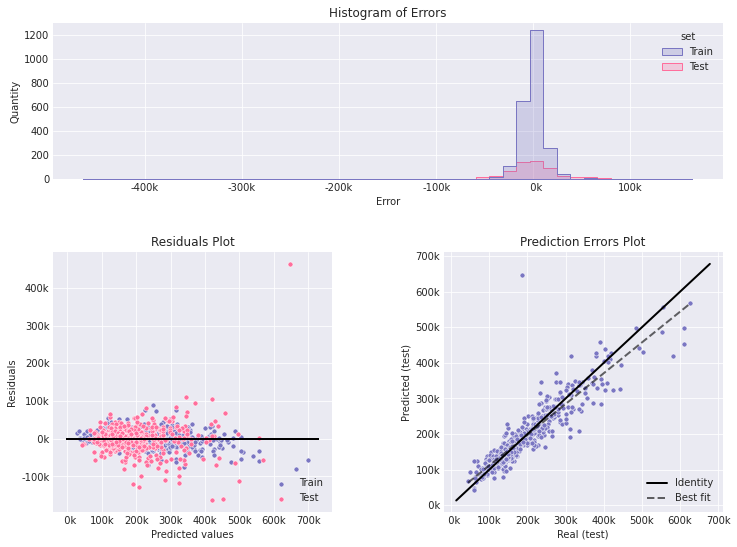

In [ ]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)

y_train_pred_forest = forest.predict(X_train).reshape(1, -1)[0]
y_test_pred_forest = forest.predict(X_test).reshape(1, -1)[0]

evaluate_model(y_train, y_train_pred_forest, y_test, y_test_pred_forest)

In [ ]:
forest_metrics = {
    'Model': 'Random Forest',
    'Media': round(np.mean(y_test), 2),
    'MAE': round(mean_absolute_error(y_test, y_test_pred_forest), 2),
    'MSE': round(mean_squared_error(y_test, y_test_pred_forest), 2), 
    'RMSE': round(np.sqrt(mean_squared_error(y_test, y_test_pred_forest)), 2), 
    'R2': round(r2_score(y_test, y_test_pred_forest), 3)
}

for k, v in forest_metrics.items():
    print(f"{k}: {v}")

Model: Random Forest
Media: 189651.47
MAE: 21236.84
MSE: 1273610417.0
RMSE: 35687.68
R2: 0.841


In [ ]:
linreg_metrics = test_metrics.loc[0]
linreg_metrics['Model'] = 'Linear Regression'

all_model_metrics = pd.DataFrame(
    data=[
        linreg_metrics,
        pd.Series(tree_metrics),
        pd.Series(forest_metrics),
    ],
    index=[0, 1, 2]
)

In [ ]:
all_model_metrics

,Model,Media,MAE,MSE,RMSE,R2
0,Linear Regression,189651.47,26958.54,1.725968e+09,41544.77,0.785
1,Decision Tree,189651.47,26705.66,1.981078e+09,44509.30,0.753
2,Random Forest,189651.47,21236.84,1.273610e+09,35687.68,0.841


Viendo la comparatativa de los 3 modelos, notamos que Random Forest supera en todas las métricas a los otros dos algoritmos. 

Además, viendo las gráficas de residuos, notamos que ya no hay un patrón reconocible y los errores están mucho mejor distribuidos.

Con cual, podemos inferir que el problema de la regresión lineal yace en que la variables de dataset no tiene un relación modelable linealmente, y por ello el modelo de bosques aleatorios (que sí es capaz de detectar cualquier tipo de relación) tiene un rendimiento superior.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84c4c59f-8728-4879-a88a-d87321dd872b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>